# Análisis de resultados

En este notebook se hace el análisis de los resultados obtenidos con cada uno de los algoritmos, así como también sus rendimientos.

## Visualización general de los resultados

Vamos a comenzar cargando los archivos csv que contienen los resultados guardados en main.py. Para la visualización de los resultados vamos a utilizar los itemsets frecuentes encontrados con un soporte mínimo del 2.5%, que es el valor que dió una cantidad decente de resultados.

En este caso los resultados son del análisis completo del dataset original, con todas las transacciones y todos los productos.

In [1]:
import pandas as pd

df_eclat = pd.read_csv('results/eclat_0.025_None_None.csv')
df_eclat['itemsets'] = df_eclat["itemsets"].apply(eval)
df_apriori = pd.read_csv('results/apriori_0.025_None_None.csv')
df_apriori['itemsets'] = df_apriori["itemsets"].apply(eval)
df_fp_growth = pd.read_csv('results/fp_growth_0.015_None_None.csv')
df_fp_growth['itemsets'] = df_fp_growth["itemsets"].apply(eval)

La cantidad de itemsets frecuentes encontrados son los mismos para todos los algoritmos.

In [2]:
print(f"ECLAT: {df_eclat.shape}")
print(f"APRIORI: {df_apriori.shape}")
print(f"FP-GROWTH: {df_fp_growth.shape}")

ECLAT: (229, 2)
APRIORI: (229, 2)
FP-GROWTH: (757, 2)


Los datasets cuentan con una columna de support y otra con el frozenset del conjunto de items. Lo hicimos de este modo también en ECLAT para mantener el formato de mlxtend.

In [3]:
df_eclat.head()

,support,itemsets
0,0.039549,(23355)
1,0.027917,(23293)
2,0.036211,(23344)
3,0.028423,(23322)
4,0.031811,(23321)


In [4]:
type(df_eclat['itemsets'].iloc[0])

frozenset

Generemos entonces las reglas de asociación para cada algoritmo, que deberían ser iguales.

In [5]:
from mlxtend.frequent_patterns import association_rules

def generate_rules(df):
    rules = association_rules(df, metric="lift", min_threshold=1)
    return rules.sort_values('lift', ascending=False)

df_eclat_rules = generate_rules(df_eclat)
df_apriori_rules = generate_rules(df_apriori)
df_fp_growth_rules = generate_rules(df_fp_growth)

In [6]:
df_eclat_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
17,(22698),"(22697, 22699)",0.038689,0.038790,0.027361,0.707190,18.231107,1.0,0.025860,3.282703,0.983187,0.545913,0.695373,0.706268
12,"(22697, 22699)",(22698),0.038790,0.038689,0.027361,0.705346,18.231107,1.0,0.025860,3.262502,0.983291,0.545913,0.693487,0.706268
13,"(22698, 22699)",(22697),0.030243,0.051231,0.027361,0.904682,17.658719,1.0,0.025811,9.953747,0.972791,0.505607,0.899535,0.719370
16,(22697),"(22698, 22699)",0.051231,0.030243,0.027361,0.534057,17.658719,1.0,0.025811,2.081279,0.994311,0.505607,0.519526,0.719370
10,(22697),(22698),0.051231,0.038689,0.031963,0.623889,16.125707,1.0,0.029981,2.555926,0.988637,0.551483,0.608752,0.725017


In [7]:
df_apriori_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
86,(22698),"(22697, 22699)",0.038689,0.038790,0.027361,0.707190,18.231107,1.0,0.025860,3.282703,0.983187,0.545913,0.695373,0.706268
83,"(22697, 22699)",(22698),0.038790,0.038689,0.027361,0.705346,18.231107,1.0,0.025860,3.262502,0.983291,0.545913,0.693487,0.706268
84,"(22699, 22698)",(22697),0.030243,0.051231,0.027361,0.904682,17.658719,1.0,0.025811,9.953747,0.972791,0.505607,0.899535,0.719370
85,(22697),"(22699, 22698)",0.051231,0.030243,0.027361,0.534057,17.658719,1.0,0.025811,2.081279,0.994311,0.505607,0.519526,0.719370
59,(22698),(22697),0.038689,0.051231,0.031963,0.826144,16.125707,1.0,0.029981,5.457202,0.975738,0.551483,0.816756,0.725017


In [8]:
df_fp_growth_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
712,(23170),(23171),0.022505,0.019269,0.016133,0.716854,37.203026,1.0,0.015699,3.463694,0.995525,0.629191,0.711291,0.777062
713,(23171),(23170),0.019269,0.022505,0.016133,0.837270,37.203026,1.0,0.015699,6.006862,0.992240,0.629191,0.833524,0.777062
5,(22745),(22748),0.021393,0.022050,0.015830,0.739953,33.557535,1.0,0.015358,3.760661,0.991409,0.573260,0.734089,0.728921
4,(22748),(22745),0.022050,0.021393,0.015830,0.717890,33.557535,1.0,0.015358,3.468884,0.992076,0.573260,0.711723,0.728921
225,(21094),(21086),0.026653,0.021646,0.017701,0.664137,30.682181,1.0,0.017124,2.912953,0.993898,0.578512,0.656706,0.740947


Que sean iguales con el mismo soporte mínimo nos demuestra que nuestro algoritmo de eclat está funcionando correctamente.

Las reglas de asociación nos ayudan a identificar relaciones donde "si se da el antecendente, entonces sucede el consecuente". En este caso, para la primera regla, podemos decir que: si una persona compra el producto de código 22698, entonces posiblemente compre los productos de códigos 22697 y 22699.

Además, las métricas nos ayudan a analizar que tan buena es esa regla.

- El support de 2.7% indica el porcentaje de facturas totales donde los productos 22697, 22699 y 22698 aparecen juntos.
- El confidence de 70% indica qué tan a menudo los ítems 22697 y 22699 aparecen en las transacciones que contienen a 22698. Es decir, el 70% de las veces que se compra 22697 y 22699, también se compra 22698.
- Mientras que lift mide cuánto más probable es que el consecuente ocurra junto con el antecedente, en comparación con su probabilidad de ocurrir de forma independiente. En este caso, un lift de 18 indica que hay una gran correlación positiva.

Podemos ver las visualizaciones brindadas en el repositorio del github de la materia.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(rules, frequent_itemsets):
    # ===== VISUALIZACIONES =====

    # 1. Distribución del soporte de los conjuntos frecuentes
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.hist(frequent_itemsets['support'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribución del Soporte')
    plt.xlabel('Soporte')
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)

    # 2. Top 10 conjuntos frecuentes por soporte
    plt.subplot(2, 3, 2)
    top_itemsets = frequent_itemsets.nlargest(10, 'support')
    plt.barh(range(len(top_itemsets)), top_itemsets['support'], color='lightcoral')
    plt.yticks(range(len(top_itemsets)), [str(items)[:30] + '...' if len(str(items)) > 30 else str(items) 
                                        for items in top_itemsets['itemsets']])
    plt.title('Top 10 Conjuntos Frecuentes')
    plt.xlabel('Soporte')
    plt.gca().invert_yaxis()

    # 3. Distribución de la confianza
    plt.subplot(2, 3, 3)
    plt.hist(rules['confidence'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Distribución de la Confianza')
    plt.xlabel('Confianza')
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)

    # 4. Distribución del lift
    plt.subplot(2, 3, 4)
    plt.hist(rules['lift'], bins=30, alpha=0.7, color='gold', edgecolor='black')
    plt.title('Distribución del Lift')
    plt.xlabel('Lift')
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)

    # 5. Scatter plot: Confianza vs Soporte
    plt.subplot(2, 3, 5)
    plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis')
    plt.colorbar(label='Lift')
    plt.title('Confianza vs Soporte (coloreado por Lift)')
    plt.xlabel('Soporte')
    plt.ylabel('Confianza')
    plt.grid(True, alpha=0.3)

    # 6. Top 10 reglas por lift
    plt.subplot(2, 3, 6)
    top_rules = rules.head(10)
    plt.barh(range(len(top_rules)), top_rules['lift'], color='mediumpurple')
    plt.yticks(range(len(top_rules)), [f"{str(rule)[:25]}..." if len(str(rule)) > 25 else str(rule) 
                                    for rule in top_rules.index])
    plt.title('Top 10 Reglas por Lift')
    plt.xlabel('Lift')
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

    # ===== ANÁLISIS ADICIONAL =====

    # 7. Análisis de la longitud de los conjuntos frecuentes
    plt.figure(figsize=(15, 10))

    # Contar longitud de itemsets
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
    length_counts = frequent_itemsets['length'].value_counts().sort_index()

    plt.subplot(2, 3, 1)
    plt.bar(length_counts.index, length_counts.values, color='coral')
    plt.title('Distribución por Longitud de Conjuntos')
    plt.xlabel('Número de Items')
    plt.ylabel('Cantidad de Conjuntos')
    plt.grid(True, alpha=0.3)

    # 8. Soporte promedio por longitud
    plt.subplot(2, 3, 2)
    avg_support_by_length = frequent_itemsets.groupby('length')['support'].mean()
    plt.bar(avg_support_by_length.index, avg_support_by_length.values, color='lightblue')
    plt.title('Soporte Promedio por Longitud')
    plt.xlabel('Número de Items')
    plt.ylabel('Soporte Promedio')
    plt.grid(True, alpha=0.3)

    # 9. Heatmap de correlación entre métricas
    plt.subplot(2, 3, 3)
    correlation_matrix = rules[['support', 'confidence', 'lift', 'leverage', 'conviction']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Correlación entre Métricas')

    # 10. Análisis de reglas por rangos de lift
    plt.subplot(2, 3, 4)
    lift_ranges = pd.cut(rules['lift'], bins=[0, 1, 2, 5, 10, 100], labels=['0-1', '1-2', '2-5', '5-10', '10+'])
    lift_dist = lift_ranges.value_counts()
    plt.pie(lift_dist.values, labels=lift_dist.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Reglas por Rango de Lift')

    # 11. Análisis de reglas por rangos de confianza
    plt.subplot(2, 3, 5)
    conf_ranges = pd.cut(rules['confidence'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                        labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0'])
    conf_dist = conf_ranges.value_counts()
    plt.pie(conf_dist.values, labels=conf_dist.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Reglas por Rango de Confianza')

    # 12. Gráfico de dispersión 3D (Soporte, Confianza, Lift)
    from mpl_toolkits.mplot3d import Axes3D
    ax = plt.subplot(2, 3, 6, projection='3d')
    scatter = ax.scatter(rules['support'], rules['confidence'], rules['lift'], 
                        c=rules['lift'], cmap='viridis', alpha=0.6)
    ax.set_xlabel('Soporte')
    ax.set_ylabel('Confianza')
    ax.set_zlabel('Lift')
    ax.set_title('Reglas en 3D')
    plt.colorbar(scatter, ax=ax, label='Lift')

    plt.tight_layout()
    plt.show()

    # ===== RESUMEN ESTADÍSTICO =====
    print("\n" + "="*50)
    print("RESUMEN ESTADÍSTICO DE LAS REGLAS DE ASOCIACIÓN")
    print("="*50)

    print(f"\nTotal de conjuntos frecuentes: {len(frequent_itemsets)}")
    print(f"Total de reglas generadas: {len(rules)}")
    print(f"Conjuntos de 1 item: {len(frequent_itemsets[frequent_itemsets['itemsets'].apply(len) == 1])}")
    print(f"Conjuntos de 2 items: {len(frequent_itemsets[frequent_itemsets['itemsets'].apply(len) == 2])}")
    print(f"Conjuntos de 3+ items: {len(frequent_itemsets[frequent_itemsets['itemsets'].apply(len) >= 3])}")

    print(f"\nEstadísticas de las reglas:")
    print(f"Confianza promedio: {rules['confidence'].mean():.4f}")
    print(f"Lift promedio: {rules['lift'].mean():.4f}")
    print(f"Soporte promedio: {rules['support'].mean():.4f}")

    print(f"\nTop 5 reglas más fuertes (por lift):")
    for i, (idx, rule) in enumerate(rules.head().iterrows(), 1):
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        print(f"{i}. {antecedents} → {consequents}")
        print(f"   Lift: {rule['lift']:.3f}, Confianza: {rule['confidence']:.3f}, Soporte: {rule['support']:.3f}")


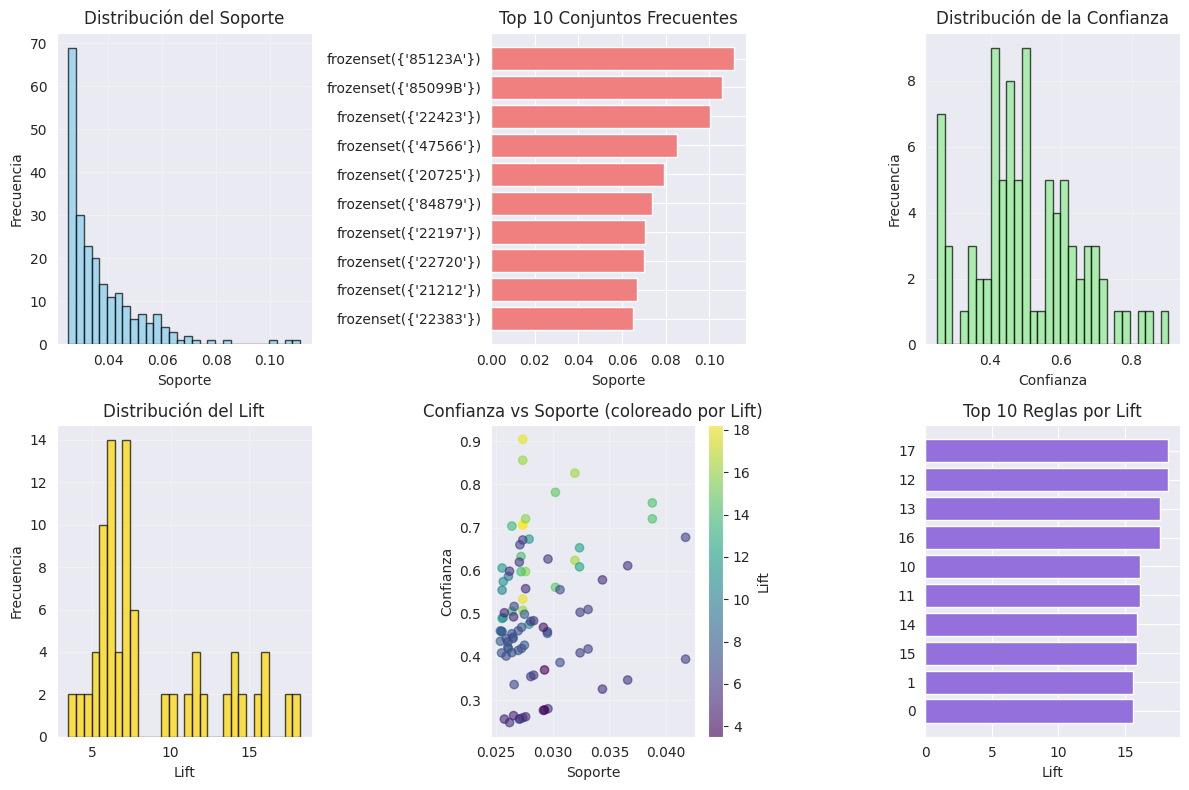

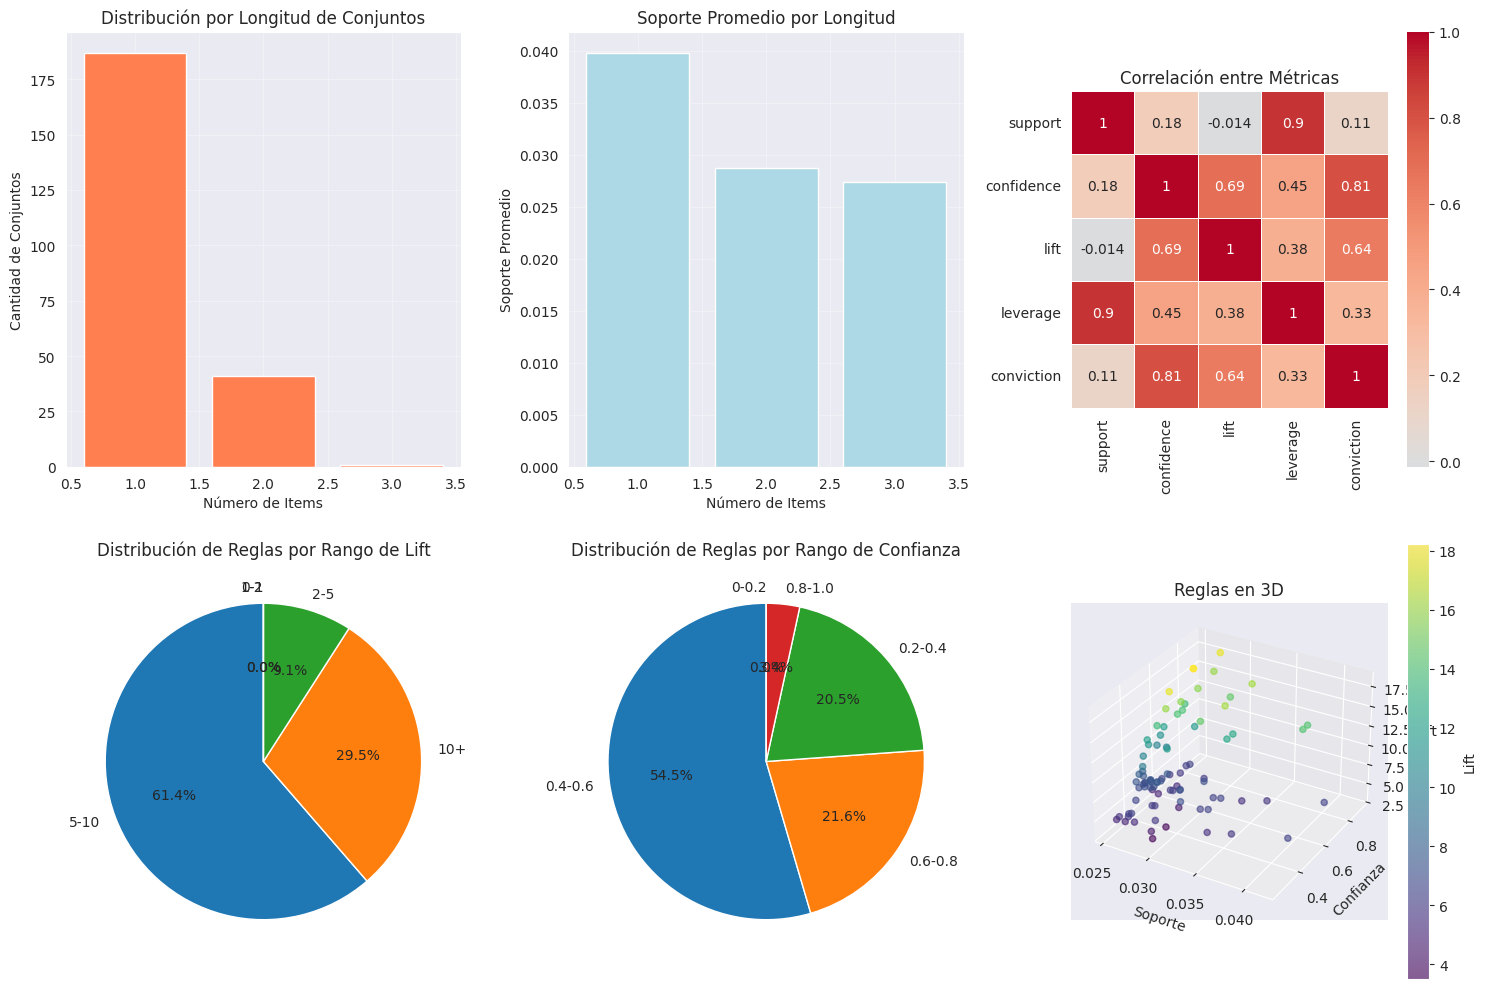


RESUMEN ESTADÍSTICO DE LAS REGLAS DE ASOCIACIÓN

Total de conjuntos frecuentes: 229
Total de reglas generadas: 88
Conjuntos de 1 item: 187
Conjuntos de 2 items: 41
Conjuntos de 3+ items: 1

Estadísticas de las reglas:
Confianza promedio: 0.5013
Lift promedio: 8.8083
Soporte promedio: 0.0287

Top 5 reglas más fuertes (por lift):
1. ['22698'] → ['22697', '22699']
   Lift: 18.231, Confianza: 0.707, Soporte: 0.027
2. ['22697', '22699'] → ['22698']
   Lift: 18.231, Confianza: 0.705, Soporte: 0.027
3. ['22698', '22699'] → ['22697']
   Lift: 17.659, Confianza: 0.905, Soporte: 0.027
4. ['22697'] → ['22698', '22699']
   Lift: 17.659, Confianza: 0.534, Soporte: 0.027
5. ['22697'] → ['22698']
   Lift: 16.126, Confianza: 0.624, Soporte: 0.032


In [10]:
plot_results(df_eclat_rules, df_eclat)

Analicemos, por ejemplo, las que tienen una confianza mayor al 70%.

In [11]:
df_eclat_rules[df_eclat_rules['confidence'] > 0.7]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
17,(22698),"(22697, 22699)",0.038689,0.038790,0.027361,0.707190,18.231107,1.0,0.025860,3.282703,0.983187,0.545913,0.695373,0.706268
12,"(22697, 22699)",(22698),0.038790,0.038689,0.027361,0.705346,18.231107,1.0,0.025860,3.262502,0.983291,0.545913,0.693487,0.706268
13,"(22698, 22699)",(22697),0.030243,0.051231,0.027361,0.904682,17.658719,1.0,0.025811,9.953747,0.972791,0.505607,0.899535,0.719370
11,(22698),(22697),0.038689,0.051231,0.031963,0.826144,16.125707,1.0,0.029981,5.457202,0.975738,0.551483,0.816756,0.725017
14,"(22697, 22698)",(22699),0.031963,0.053861,0.027361,0.856013,15.892900,1.0,0.025639,6.570985,0.968019,0.467993,0.847816,0.681997
1,(23300),(23301),0.038335,0.046174,0.027613,0.720317,15.600023,1.0,0.025843,3.410378,0.973205,0.485333,0.706777,0.659173
19,(22698),(22699),0.038689,0.053861,0.030243,0.781699,14.513184,1.0,0.028159,4.334108,0.968570,0.485390,0.769272,0.671601
31,(22699),(22697),0.053861,0.051231,0.038790,0.720188,14.057525,1.0,0.036031,3.390733,0.981742,0.585050,0.705079,0.738672
30,(22697),(22699),0.051231,0.053861,0.038790,0.757157,14.057525,1.0,0.036031,3.896091,0.979020,0.585050,0.743333,0.738672
21,(22356),(20724),0.037526,0.052192,0.026400,0.703504,13.479056,1.0,0.024441,3.196697,0.961907,0.416933,0.687177,0.604659


La mayoría tienen que ver con los mismos productos dispuestos como antecedentes o consecuentes y agrupados de distintas maneras. Veamos cuales son esos productos.

In [12]:
retail_df = pd.read_excel('data/online_retail_2.xlsx')
products_df = retail_df.groupby('StockCode')['Description'].first().reset_index()

In [13]:
products_df[products_df['StockCode'].isin([22697, 22698, 22699])]

,StockCode,Description
1531,22697,GREEN REGENCY TEACUP AND SAUCER
1532,22698,PINK REGENCY TEACUP AND SAUCER
1533,22699,ROSES REGENCY TEACUP AND SAUCER


Estos tres productos, por ejemplo, corresponden a un hermoso juego de tazas con motivos floreados para tomer el té. La gente que compra una generalmete también compra las otras, por lo que ya sabemos que recomendar cómo próxima compra a los que agreguen al carrito una de estas tazas.

Es interesante también como las mismas también cambian entre de lugar en las reglas, siendo antecedentes o consecuentes y manteniendo muy buenos niveles en las métricas. Claramente hay una gran relación entre ellas y responden a un muy buen conjunto para tener en cuenta a la hora de recomendaciones.

In [14]:
products_df[products_df['StockCode'].isin([23300, 23301])]

,StockCode,Description
2104,23300,GARDENERS KNEELING PAD CUP OF TEA
2105,23301,GARDENERS KNEELING PAD KEEP CALM


En este caso tenemos alguna especie de pads para apoyar las rodillas en el jardín ¿?. Parece ser que mucha gente los compra juntos, pero hay algo particular. A diferencia del caso anterior, la regla no aparece en las dos direcciones.

Veamos que tan buena es la relación en la otra dirección.

In [15]:
df_eclat_rules[df_eclat_rules["antecedents"].apply(lambda fs: {'23301'}.issubset(fs))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(23301),(23300),0.046174,0.038335,0.027613,0.598028,15.600023,1.0,0.025843,2.392371,0.981204,0.485333,0.582005,0.659173


La regla sigue siendo buena, sin embargo su confidence es más bajo. Esto significa que, el pad de keep calm aparece más veces en solitario que el de cup of tea.

In [16]:
products_df[products_df['StockCode'].isin([22356, 20724])]

,StockCode,Description
102,20724,RED RETROSPOT CHARLOTTE BAG
1214,22356,CHARLOTTE BAG PINK POLKADOT


Y esos de arriba son los productos de la última regla. Dos bolsos con motivos.

#### Observando un itemset de 4 elementos.

Con un min support de 0.015 encontramos este item set:

```
frozenset({'22698', '22697', '22423', '22699'})
```

Veamos los elementos:

In [ ]:
products_df[products_df['StockCode'].isin([22698, 22697, 22423, 22699])]

,StockCode,Description
1271,22423,REGENCY CAKESTAND 3 TIER
1531,22697,GREEN REGENCY TEACUP AND SAUCER
1532,22698,PINK REGENCY TEACUP AND SAUCER
1533,22699,ROSES REGENCY TEACUP AND SAUCER


Ahora analicemos Sporte, Confianza y Lift de los productos

In [ ]:
# Conjunto de productos a filtrar
filter_items = {"22698", "22697", "22423", "22699"}

# Filtrar reglas que contengan alguno de los productos en antecedents o consequents
mask = df_fp_growth_rules.apply(
    lambda row: len(filter_items & row["antecedents"]) > 0 or len(filter_items & row["consequents"]) > 0,
    axis=1
)

filtered_rules = df_fp_growth_rules[mask]

In [ ]:
if not filtered_rules.empty:
    metrics = {
        "total_rules": len(filtered_rules),
        "avg_support": filtered_rules["support"].mean(),
        "avg_confidence": filtered_rules["confidence"].mean(),
        "avg_lift": filtered_rules["lift"].mean(),
        "max_lift_rule": filtered_rules.loc[filtered_rules["lift"].idxmax()].to_dict(),
        "max_confidence_rule": filtered_rules.loc[filtered_rules["confidence"].idxmax()].to_dict()
    }

    print("=== Métricas de las reglas filtradas ===")
    print(f"Total de reglas: {metrics['total_rules']}")
    print(f"Soporte promedio: {metrics['avg_support']:.4f}")
    print(f"Confianza promedio: {metrics['avg_confidence']:.4f}")
    print(f"Lift promedio: {metrics['avg_lift']:.4f}")
    print("\nRegla con mayor Lift:")
    print(metrics["max_lift_rule"])
    print("\nRegla con mayor Confianza:")
    print(metrics["max_confidence_rule"])
else:
    print("No se encontraron reglas con esos productos.")

=== Métricas de las reglas filtradas ===
Total de reglas: 60
Soporte promedio: 0.0204
Confianza promedio: 0.4903
Lift promedio: 11.7490

Regla con mayor Lift:
{'antecedents': frozenset({'22697', '22699'}), 'consequents': frozenset({'22423', '22698'}), 'antecedent support': 0.0387902695595003, 'consequent support': 0.0198250139078541, 'support': 0.015222778536388, 'confidence': 0.3924380704041722, 'lift': 19.795096852300293, 'representativity': 1.0, 'leverage': 0.014453760902881497, 'conviction': 1.6132923054349273, 'zhangs_metric': 0.9877994464416379, 'jaccard': 0.35081585081585126, 'certainty': 0.38014952613908976, 'kulczynski': 0.5801476066306583}

Regla con mayor Confianza:
{'antecedents': frozenset({'22423', '22698', '22699'}), 'consequents': frozenset({'22697'}), 'antecedent support': 0.0167399989885197, 'consequent support': 0.0512314772669802, 'support': 0.015222778536388, 'confidence': 0.9093655589123864, 'lift': 17.750133461376727, 'representativity': 1.0, 'leverage': 0.014365

Vemos que entre los 4 poseen un lift muy cercano al del top 5. Salvo la confianza y el soporte. Estos dos ultimos estadisticos se pueden tomar con pinzas por la siguiente observacion:

Si vemos el top de reglas mas fuertes por lift del comienzo observaremos que se tratan de los mismos productos pero con la excepcion de un cuarto: el producto 22423 (REGENCY CAKESTAND 3 TIER). Por lo tanto, esta transaccion refleja una asociacion fuerte entre productos y una oportunidad de negocios clave. De hecho, la regla con mayor confianza incluye como antecedente al Cakestand.

Investigando sobre los tipos de producto se tratan de los siguientes:

<p>
  <img src="images/22423.jpeg" alt="Texto alternativo" width="200"/>
  <img src="images/22697.jpeg" alt="Texto alternativo" width="200"/>
  <img src="images/22698.jpg" alt="Texto alternativo" width="200"/>
  <img src="images/22699.jpg" alt="Texto alternativo" width="200"/>
</p>

#### Estrategia de marketing de ejemplo

Los clientes suelen llevar tazas y de vez en cuando compran un stand para colocarlas. Por lo tanto, como una primera recomendacion de marketing podemos realizar una promocion con estos productos.

<p>
  <img src="images/flyer.png" alt="Texto alternativo" width="500"/>
</p>

## Análisis de rendimiento

Primero queremos aclarar porque usamos una implementación propia de Eclat. Esto se debe a que la implementación del paquete pyECLAT por algún motivo no terminaba de ejecutar incluso después de horas. Por ese motivo, y entendiendo que había un error, decidimos hacer una implementación rápida nosotros mismos. Esto obviamente genera algunas cuestiones de discrepancia con respecto al benchmark, nuestro algoritmo está implementado de manera diferente al de mlxtend, probablemente usando otros métodos y estructuras de datos.

A pesar de ello vamos a evaluar entonces el rendimiento de los modelos con diferentes valores de min support o transacciones.

Todos los datos de las ejecuciones fueron guardados en el archivo "benchmark.csv" en la carpeta de resultados. En ellos se expone la información necesaria para el análisis de uso de recursos.

In [17]:
benchmark_df = pd.read_csv('results/benchmark_i5-9400F.csv')
benchmark_df.head()

,Total_RAM_GB,Hostname,OS,CPU,Logical_CPUs,Physical_CPUs,Algorithm,Min_Support,Is_Data_Sample,Max_Transactions,...,len_1,len_2,len_3,len_4,Duration_s,User_Time_s,Sys_Time_s,RSS_Memory_KB,Peak_Memory_MB,Peak_Tracked_Bytes
0,16.7,debian,Linux,NaN,6,6,apriori,0.10,False,19773,...,3,0,0,0,0.9980,0.20,0.03,3721416,447.91,899125
1,16.7,debian,Linux,NaN,6,6,apriori,0.20,False,19773,...,0,0,0,0,0.9945,0.19,0.03,3721416,457.61,852949
2,16.7,debian,Linux,NaN,6,6,apriori,0.02,False,19773,...,298,88,3,0,2.7455,1.64,0.47,3721416,2963.47,2626234761
3,16.7,debian,Linux,NaN,6,6,apriori,0.03,False,19773,...,132,10,0,0,1.0557,0.43,0.07,3721416,860.20,513489994
4,16.7,debian,Linux,NaN,6,6,apriori,0.04,False,19773,...,71,1,0,0,0.7597,0.21,0.04,3721416,543.30,147925331


#### Graficas de longitud de itemsets

Abajo se puede ver una serie de gráficas que muestran la cantidad de itemsets de determinadas longitudes con diferentes valores de min_support. Además se ve por cada algoritmo para demostrar que todos son iguales.

In [ ]:
BAR_METRICS = ("len_1", "len_2", "len_3", "len_4")

# === BAR PLOT FUNCTION ===
def plot_bar_metric_vs_min_support(metric):
    plt.figure(figsize=(10, 6))

    min_supports = sorted(df_first["Min_Support"].unique())
    bar_width = 0.25
    x = np.arange(len(min_supports))

    for i, algo in enumerate(ALGORITHMS):
        algo_data = df_first[df_first["Algorithm"] == algo]
        values = algo_data.set_index("Min_Support").reindex(min_supports)[metric]

        # Bar position shifted by algorithm index
        plt.bar(x + i * bar_width, values, width=bar_width, label=algo)

        # Add value labels
        for xi, val in zip(x + i * bar_width, values):
            plt.text(xi, val, f"{val:.0f}", ha='center', va='bottom', fontsize=8)

    plt.title(f"{metric.replace('_', ' ').replace('len', 'Itemset Length')} vs Min_Support")
    plt.xlabel("Min_Support")
    plt.ylabel(metric.replace("_", " "))
    plt.xticks(x + bar_width, [str(ms) for ms in min_supports])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Obviamente, a medida que vamos bajando el valor del min. support, la cantidad de items frecuentes de cada longitud va disminuyendo. Esto se verá reflejado luego en los rendimientos de cada algoritmo.

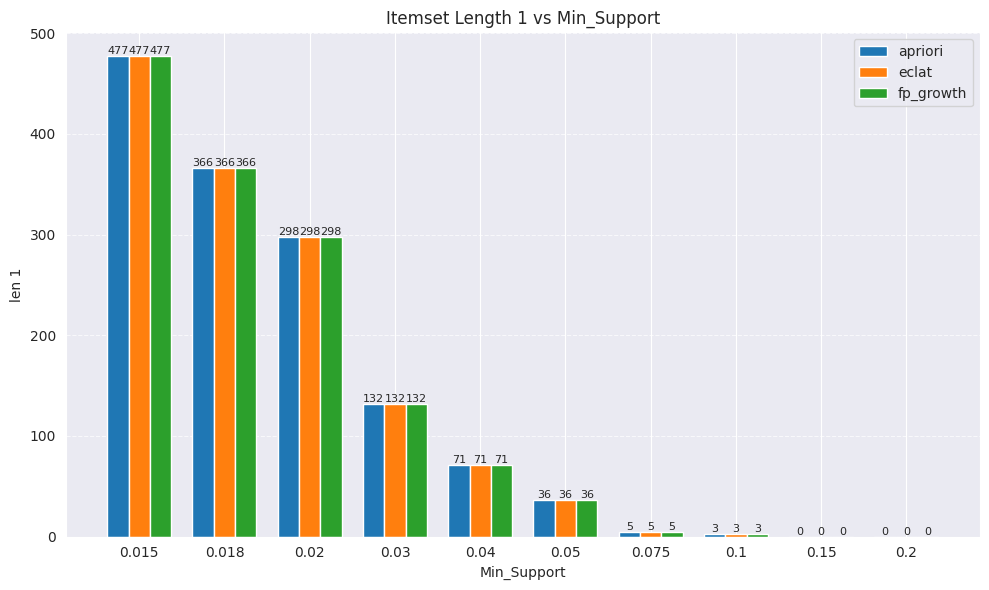

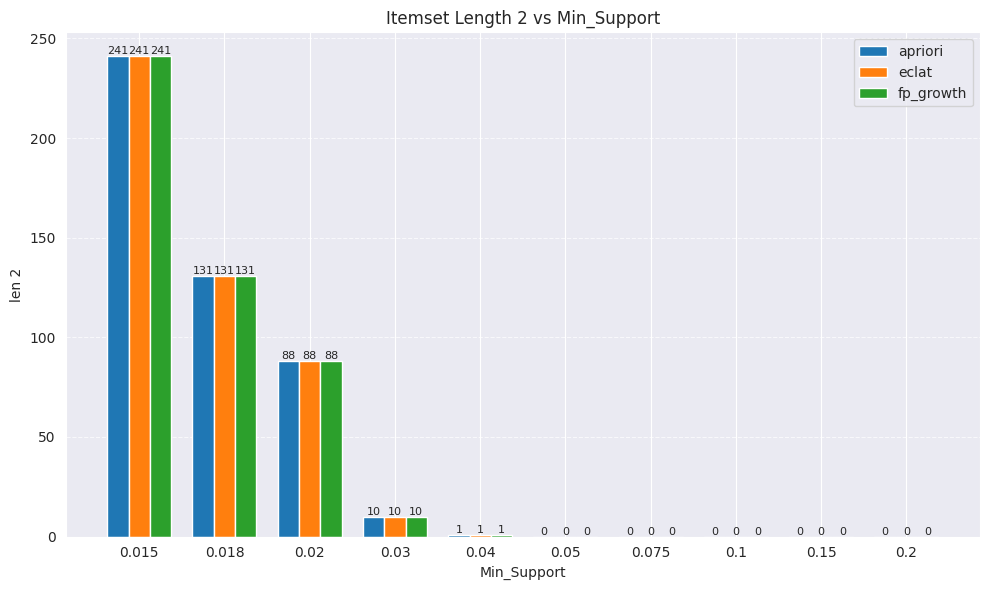

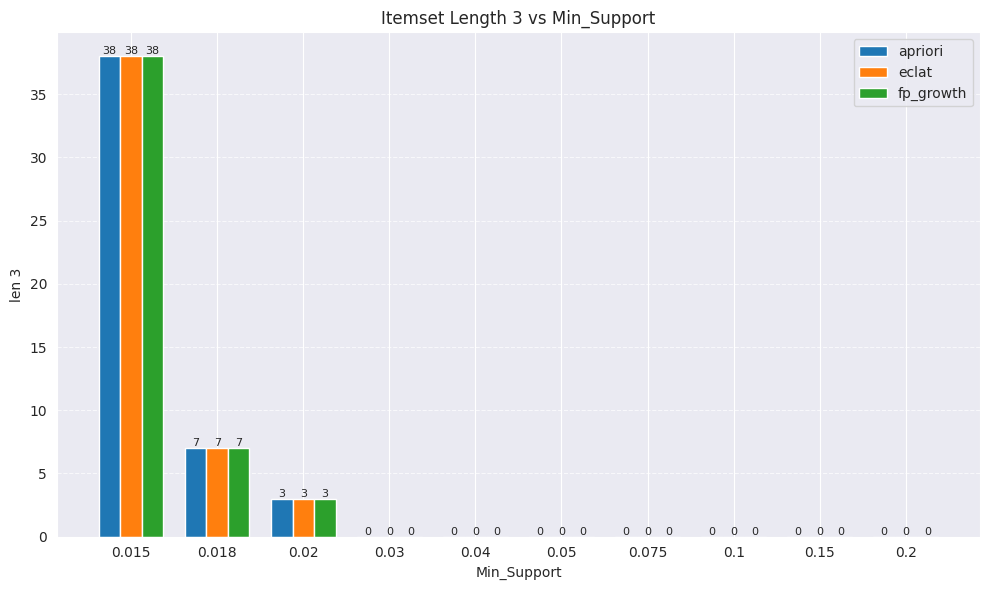

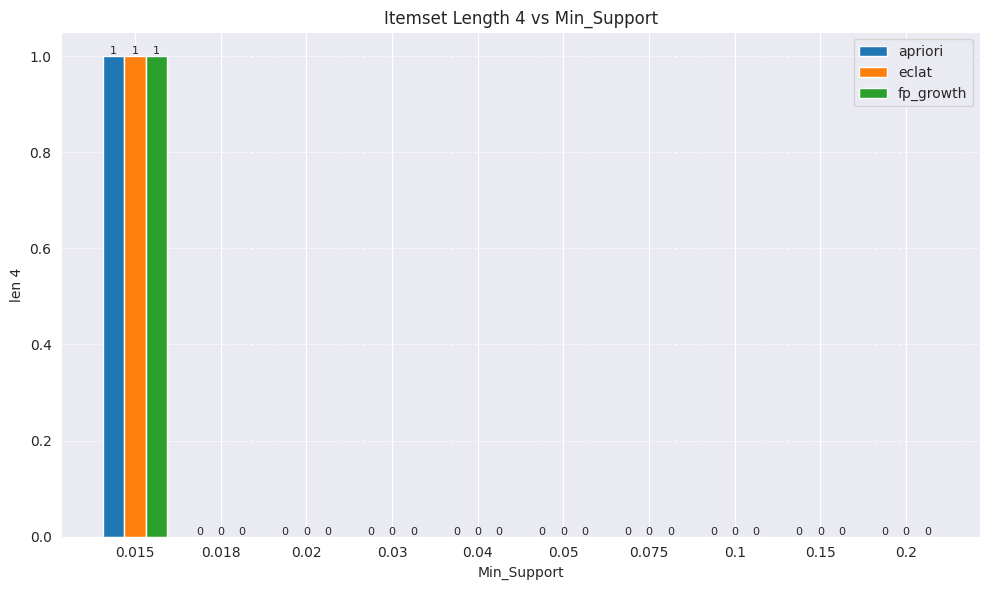

In [ ]:
for metric in BAR_METRICS:
    plot_bar_metric_vs_min_support(metric)

En este caso, por ejemplo, recién con un min support de 0.015 obtenemos un itemset de cuatro productos.

### Métricas

Para las pruebas de rendimiento se ejecutaron en el siguiente sistema:

- Sistema Operativo: Debian 12.
- RAM: 16 GB.
- Procesador: Intel i5 9400F (6 núcleos).

A continuacion se declaran las funciones y configuraciones de los conjuntos de graficas. Tenemos las graficas de rendimiento. En cada una, se consideran los 3 algoritmos para diferentes valores de min_support, sobre el dataset completo.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === CONFIGURATION ===
CSV_FILE = "results/benchmark_i5-9400F.csv"
ALGORITHMS = ("apriori", "eclat", "fp_growth")
LINE_METRICS = ("Duration_s", "User_Time_s", "Sys_Time_s", "Peak_Memory_MB")

# === DATA LOADING ===
df = pd.read_csv(CSV_FILE)

# Ensure data integrity
required_columns = ("Algorithm", "Min_Support", *LINE_METRICS, *BAR_METRICS, "Is_Data_Sample")
if not all(col in df.columns for col in required_columns):
    missing = [col for col in required_columns if col not in df.columns]
    raise ValueError(f"Missing required columns in CSV: {missing}")

# Filter for known algorithms only and remove data samples
df = df[df["Algorithm"].isin(ALGORITHMS)]
df = df[df["Is_Data_Sample"] == False]

# === DATA REDUCTION: PICK FIRST ROW PER ALGORITHM AND MIN_SUPPORT ===
df = df.sort_values(by=["Min_Support", "Algorithm"])
df_first = df.groupby(["Min_Support", "Algorithm"], as_index=False).first()

# === LINE PLOT FUNCTION ===
def plot_metric_vs_min_support(metric):
    plt.figure(figsize=(10, 6))

    for algo in ALGORITHMS:
        algo_data = df_first[df_first["Algorithm"] == algo]
        plt.plot(
            algo_data["Min_Support"],
            algo_data[metric],
            marker='o',
            label=algo
        )

        # Add value labels
        for x, y in zip(algo_data["Min_Support"], algo_data[metric]):
            plt.text(x, y, f"{y:.2f}", fontsize=8, ha='center', va='bottom')

    plt.title(f"{metric.replace('_', ' ')} vs Min_Support")
    plt.xlabel("Min_Support")
    plt.ylabel(metric.replace("_", " "))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


La descripción de las distintas metricas son las siguientes:

- Duration (s): Es el tiempo real transcurrido desde que comienza la ejecución del algoritmo hasta que finaliza, medido según el reloj del sistema.
- User time (s): Es el tiempo que el procesador pasó ejecutando instrucciones del programa en modo usuario, es decir, el código Python y librerías como NumPy o pandas, sin contar llamadas al sistema operativo.
- System time (s): Es el tiempo que el CPU dedicó a realizar tareas del sistema operativo en nombre del programa, como: gestión de memoria (malloc, swap), E/S (input/output), como leer archivos o llamadas al sistema (ej., recursión profunda, manejo de pila, manejo de procesos).
- Peak Memory (MB): Es la cantidad máxima de memoria RAM que el proceso utilizó en cualquier momento durante su ejecución.

### Gráficas de rendimiento

Veamos entonces las gráficas de rendimiento de cada algoritmo con diferentes min support. Se hizo el análisis con valores de soporte mínimo desde 1.5% a 20%, donde los últimos ya no encontraban conjuntos frecuentes.

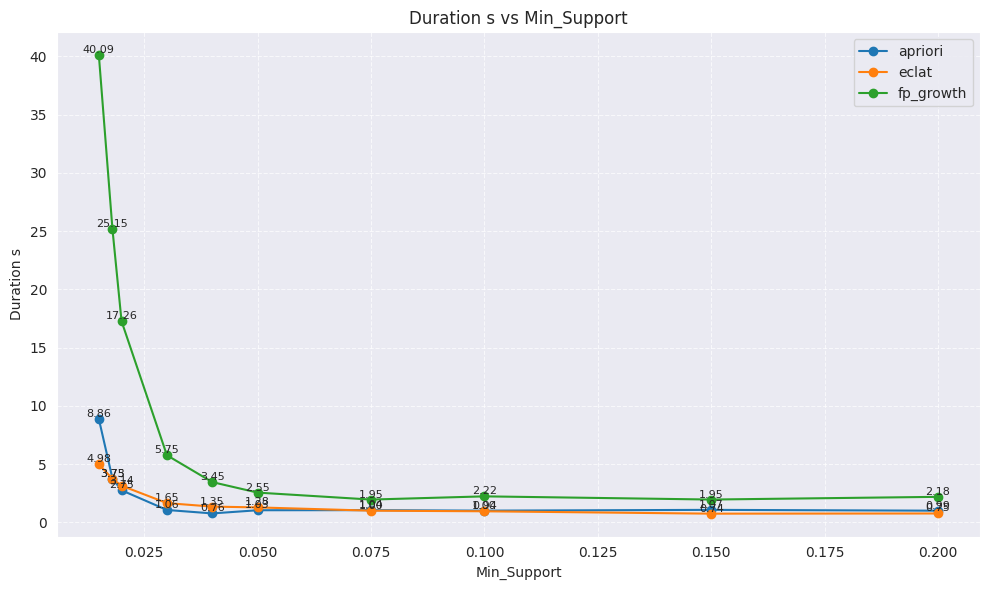

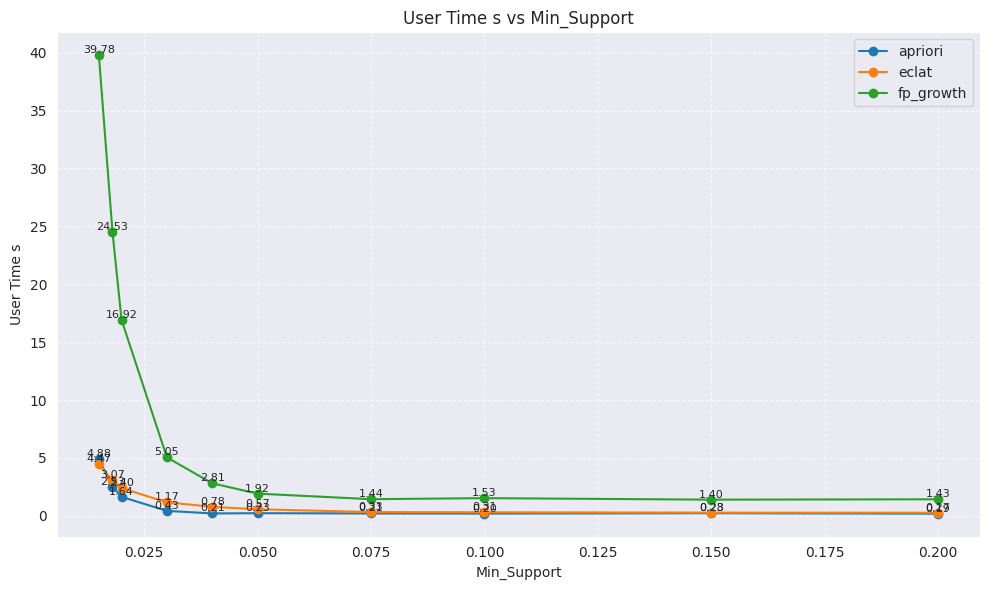

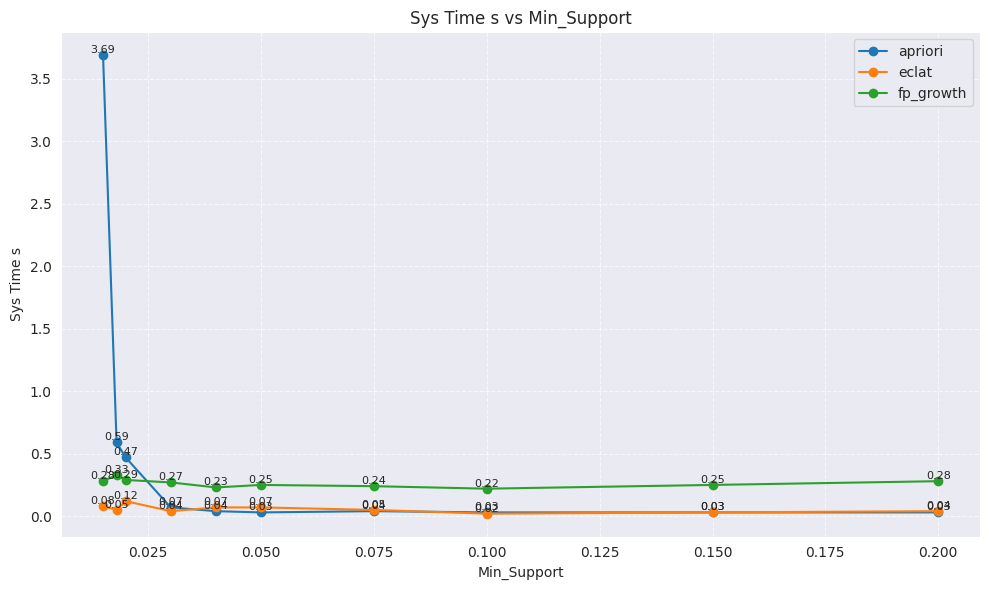

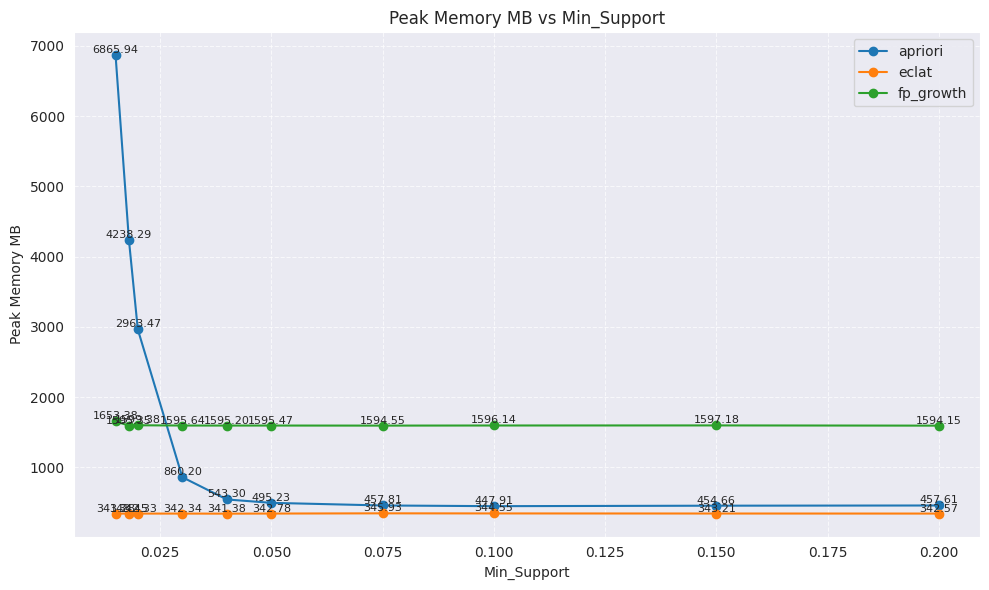

In [29]:
for metric in LINE_METRICS:
    plot_metric_vs_min_support(metric)

##### Duración (s)

En cuanto a duración FP-Growth tienen el peor rendimiento de los tres. A partir de un soporte mínimo de 0.05, los tiempos de ejecución comienzan a estabilizarse, sin mostrar mejoras significativas. Inicialmente, los tiempos son elevados por la gran cantidad de items frecuentes que se encuentran.

FP-Growth se estabiliza en aproximadamente dos segundos, mientras que los otros algoritmos están ligeramente por debajo del segundo.

El problema grave está en que, con menor soporte FP-Growth aumenta sus tiempos en gran medida. LLegando a 40s con un soporte mínimo de 0.015, frente a 8.86s de Apriori y 4.95s de Eclat.

##### User time (s)

En este caso, el comportamiento es similar al de duración. FP-Growth tiene un tiempo de ejecución mucho mayor al de los otros dos algoritmos, especialmente con soportes bajos.

Apriori y Eclat se mantienen muy cercanos en tiempo de ejecución de las instrucciones del programa. Apriori se muestra ligeramente superior con soportes más bajos, que son los de mayor cantidad de items frecuentes. Esto se puede deber al hecho de la transformación necesaria en Eclat de las transacciones a los TID lists, además de que la implementación de mlxtend seguramente sea más eficiente.

##### System time (s) y Pico de memoria (MB)

Por último vamos a analizar las dos gráficas de tiempo de sistema y pico de memoria en conjunto, ya que están relacionadas. Es que el tiempo del sistema se mantiene casi constante para FP-Growth y Eclat, ambos tienen valores bajos, no hacen demasiadas tareas del sistema operativo. Pero Apriori es muy diferente.

Podemos ver cómo, al bajar el soporte mínimo, Apriori empieza a consumir mucha más memoria. Como dijimos, Apriori genera combinaciones de items y los evalúa repetidamente para calcular sus soportes. A bajo soporte, muchos itemsets son considerados "frecuentes", por lo que se empiezan a almacenar muchos conjuntos candidatos, el dataset sigue cargado en necesidad de hacer más pasadas y los tiempos de acceso y gestión de memoria se hacen enormes.

Empezamos a ver un gran problema en Apriori, el uso de la memoria es ineficiente cuando la lista de candidatos es grande, a pesar de que la duración sea menor.

##### No coincide con la teoría

Como podemos observar, notamos que el tiempo de ejecución del algoritmo FP Growth es excesivamente mayor al del resto de algoritmos. FP Growth normalmente es el algoritmo más rápido de los 3 ya que utilizaba la "compresión" (Tree Compression) como mecanismo de optimización. La busqueda de items debería ser mucho más eficiente gracias a la utilización de estas estructuras creadas a partir del dataset. Sin embargo, no es lo que reflejaban los resultados.

Luego de buscar, encontramos que esta estrategia es más eficiente con conjuntos de datos poco dispersos (muy densos), es decir, datasets que contienen pocos elementos unicos o muchas compras muy parecidas. En este caso, FP Growth traduce un dataset con muchos elementos unicos en casi una rama por transacción y muchos caminos condicionales, lo cual termina afectando negativamente el rendimiento.

Además, al estar todos los algoritmos trabajando en memoria, apriori no necesita buscar los datos directamente en disco cada vez que tenga que hacer una iteración, que es una de sus grandes desventajas. Por lo que se reducen los tiempo de acceso, y se ve un impacto en el tiempo total de ejecución.

Para verificar este comportamiento, hemos definido la siguiente funcion que evalúa la dispersion de los datos utilizados:

In [30]:
from scripts.sparcity import measure_sparsity

# Example one-hot dataset
df = pd.read_csv("./data/boolean_basket.csv")

result = measure_sparsity(df)
print("Dataset Métricas de Dispersión:")
for k, v in result.items():
    print(f"{k}: {v}")

Dataset Metricas de Dispersión:
denisdad: 0.006688
dispersion: 0.993312
avg_items_por_transaccion: 26.1629
items_unicos: 3912
transacciones: 19773


| **Densidad** (1 - Dispersion) | Data Type        | Implicancias de los algoritmos                                                                        |
|-------------------------------|------------------|-------------------------------------------------------------------------------------------------------|
| **< 0.01**                    | **Muy disperso** | FP-Growth pierde compresión; Eclat gralmente el mejor; Apriori bueno solo para pocos datos.           |
| **0.01 – 0.05**               | **Disperso**     | Eclat sigue fuerte; FP-Growth puede no ser tan eficiente; Apriori funciona mal para min_support bajo. |
| **0.05 – 0.15**               | **Moderado**     | FP-Growth comienza a ser mejor; Eclat similar a FP-Growth; Apriori mas lento pero viable.             |
| **> 0.15**                    | **Denso**        | FP-Growth domina (Compresion de Huffman); Eclat mas lento; Apriori poco práctico.                     |




Apriori tiene un gran problema con datasets muy grandes, y es el uso de la memoria y la cantidad de pasadas que se debe hacer sobre el mismo. Pero este problema se reduce con datasets más pequeños, donde las iteraciones son más rápidas y el dataset se aloja en memoria. Lo que produce que no se vea esa diferencia de rendimiento con FP-Growth, que tiene que armar el árbol inicialmente y luego explorarlo. 

En un dataset grande y denso FP-Growth sacaría mucha ventaja de su árbol, ya que no debría iterar múltiples veces sobre el dataset enorme (sólo dos) y el árbol no tendría tantas ramas como transacciones. Apriori en cambio tardaría muchísimo más en hacer todas las iteraciones necesarias por el dataset. Habiendo una diferencia de tiempo considerable.

Pero en un dataset como el nuestro, que no es tan grande y es muy disperso, FP-Growth tiene ese overhead de tener que crear un árbol enorme con una cantidad de ramas parecida a transacciones. Por lo que, luego, tampoco lo beneficia en exploración al tener que ver muchas ramas. Apriori saca ventaja al empezar iterando directamente, y al no ser muy grande se lo hace relativamente rápido.

En resumen, el algoritmo FP-Growth es mas eficiente que Apriori cuando el dataset cuando el dataset es grande y denso, y cuando las estructuras condicionales del árbol permiten mayor reutilización. En este caso, el tamaño no es un factor que marque una diferencia en el rendimiento de los algoritmos y las ramas son raramente reutilizables por la baja densidad. Es por eso que hemos concluido que el bajo rendimiento de FP-Growth se debe a la dispersión de los datos.